<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Redes Neuronales (Perceptrón). parte 1.


Las redes neuronales artificiales (RNA) constituyen un paradigma de computación inspirado en las <a href="https://es.wikipedia.org/wiki/Neurona">neuronas</a> biológicas y su interconexión. Las neuronas biológicas son células compuestas principalmente de tres partes: soma (cuerpo celular), dendritas (canales de entrada) y axón (canal de salida). Descrito de una forma muy simplificada, las neuronas transmiten información a través de procesos electroquímicos. Cuando una neurona recibe, a través de las denritas, una cantidad de estímulos mayor a un cierto umbral, ésta se despolariza excitando, a través del axón, a otras neuronas próximas conectadas a través de las sinapsis.

<img src="Figures/neurona.jpg" width="70%">

## La neurona artificial

Inspirados por esta idea se concibió el modelo de <a href="https://es.wikipedia.org/wiki/Neurona_de_McCulloch-Pitts">neurona artificial</a>. Fundamentalmente, consiste en una unidad de cálculo que admite como entrada un vector de características $\vec{e}$ cuyos valores se suman de forma ponderada mediante unos pesos $\vec{w}$ y, si esta suma supera un cierto umbral $\theta$, genera un cierto valor de salida, por ejemplo $1$ y, si no lo supera, genera otro valor, por ejemplo, un $0$. Cuando la neurona está sola, es decir, no conectada a otras conformando una red, actúa como un clasificador lineal. 

La expresión más básica de la neurona artificial es la siguiente:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} \geq \theta \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Para entender esto, veamos antes unas cuantas cosas.

## Problemas de clasificación. ¿Qué es eso?

Una de las principales tareas que resuelven las redes neuronales son las tareas de clasificación. Pero, ¿en qué consisten esas tareas? Todos sabemos lo que significa clasificar. 

- Consiste en agrupar objetos de categorías similares. Por ejemplo, si nos dan un conjunto de monedas y nos piden que las clasifiquemos, podemos hacerlo por el valor de la moneda. Las de $\$$10 con las de $\$10$, las de $\$1$ con las de $ \$1$, etc. La propiedad que observamos para agrupar es su valor. 

- Otro ejemplo, podría ser la clasificación de las manzanas atendiendo a su color como "rojas" y "verdes". Es posible también tener en cuenta más de una propiedad del objeto para su clasificación. 

- Por ejemplo, supongamos que clasifico teléfonos móviles como "gama alta" si su cámara supera los 15 megapixeles y además tiene más de 128GB de memoria. Podríamos seguir así y utilizar tantas propiedades de los objetos como queramos para su clasificación. 

Por tanto, vamos a concretar esto y definiremos como **vector de características** al vector ordenado que agrupa cada uno de los valores de las propiedades que vamos a tener en cuenta para clasificar un objeto. 


$$ \vec{e} = (e_1, e_2, \dots, e_n) $$

Entonces, un vector de características "caracteriza" un objeto. 

En el caso de los telefonos móviles, el telefono *A* podría tener como vector de características $\vec{e_A} = (10, 64)$, siendo 10 el número de megapixeles y 64 el de megabytes. El telefono *B*: $\vec{e_B} = (12, 256)$, el telefono *C*: $\vec{e_C} = (8, 32)$, etc.

Si representamos estos vectores de características como **puntos** en unos ejes de coordenadas cartesianas tendríamos:

Text(0, 0.5, 'Eje y: Gygabytes de la memoria')

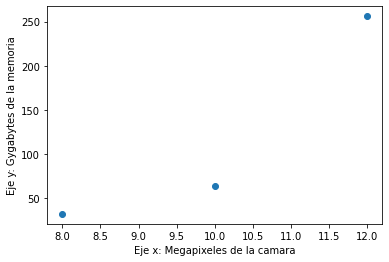

In [1]:
# Dibujar Gráfica
import numpy as np
from matplotlib import pyplot as plt

features = [[10,12,8],    # megapixeles para A,B y C
            [64,256,32]]  # Gigabytes para A,B y C

plt.scatter(features[0], features[1])

plt.xlabel("Eje x: Megapixeles de la camara")
plt.ylabel("Eje y: Gygabytes de la memoria")



Si tuviéramos un vector de características con tres propiedades representaríamos el punto en un espacio tridimensional, y así sucesivamente. Bien, pues ahora los telefonos que cumplan con la condición anterior de gama alta serán los que aparecen marcados en azul y el resto, en rojo, serán los de gama baja.

Text(0, 0.5, 'Eje y: Gygabytes de la memoria')

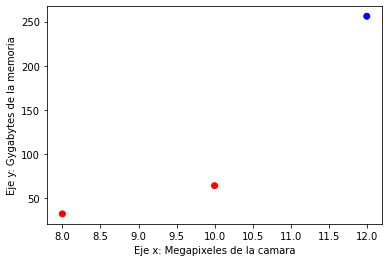

In [2]:
#Dibujar Gráfica con la clasificación

import numpy as np
from matplotlib import pyplot as plt

features = [[10,12,8],    # megapixeles para A,B y C
            [64,256,32]]  # Gigabytes para A,B y C
clases =[]

for e1,e2, in zip(features[0],features[1]):   
    if e1>11 and e2>128:
        clases.append('b')
    else:
        clases.append('r')

plt.scatter(features[0], features[1], c=clases)

plt.xlabel("Eje x: Megapixeles de la camara")
plt.ylabel("Eje y: Gygabytes de la memoria")  


### Clasificación lineal

Supongamos que tenemos ahora un ejemplo más complejo donde los objetos o **muestras** (así es como se suelen llamar estos puntos) tengan la siguiente disposición:

<img src="Figures/set1.png" width="50%">

> Decimos que un conjunto de muestras es **separable linealmente** si podemos trazar una recta (en un espacio tridimensional sería un plano y en un espacio multidimensional sería un hiperplano) que separe a ambas clases o categorías.

<img src="Figures/set2.png" width="50%">

Veamos cuándo dos conjuntos (clases o categorías) no son separables linealmente. En este caso, no podemos trazar una recta que separe perfectamente ambos comjuntos.

<img src="Figures/set3.png" width="50%">

### Terminología

Ahora que ya tenemos claro lo que significa "clasificar", definamos algo de terminología. Cada uno de los puntos u objetos a clasificar se denomina **muestra**. El conjunto de todas las muestras se denomina **conjunto de datos** (aunque te lo vas encontrar en muchos textos en español con el término anglosajón **dataset**). Todas estas muestras pertenecerán a un grupo u otro. A cada uno de estos dos grupos lo denominamos **clase**.

## El Perceptrón como clasificador lineal

Volvamos de nuevo a la definición de neurona articial y veamos qué relación tiene con los problemas de clasificación lineal. Recordemos su expresión como la vimos arriba, pero vamos a modificarla ligeramente moviendo $\theta$ a la izquierda del símbolo "mayor o igual", de esta manera:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} - \theta\geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Si queremos, podemos visualizar gráficamente la neurona de esta manera:

<img src="Figures/model.svg" width="70%">

Donde la función $g(x)$ tiene la forma "1 si $x\geq 0$ y $0$ si $x<0$". En este caso $x=\sum_{i=1}^{n} {w_i  e_i} - \theta$. Más adelante veremos que $g(x)$ tendrá otras formas. Si estudiamos bien esta fórmula nos daremos cuenta de que se trata de un discriminador lineal. 

Supongamos que tenemos un conjunto de puntos ${a,b,c,d,e}$ en un espacio $R^2$ tal como muestra la figura.

<img src="Figures/ejemplo1.png" width="40%">

Algunos de ellos ($a,b,c$) pertencen a una clase (clase 1) y los otros a otra (clase 2). Estas dos regiones están delimitadas por una recta. Nótese que la recta que separa ambas clases no es única, puede ser cualquiera que satisfaga la condición de separación de las clases. Por tanto, tenemos la función de una recta con la ecuación genérica:

$$
y = mx+b 
$$

Haciendo unos cálculos básicos, podemos concretar esta recta como la recta de la figura de ejemplo anterior:

$$
 y = \frac{1}{2} x +1 
$$

Esta recta corresponde al conjunto de todos los puntos $(x,y)$ que satisfacen la **ecuación**. Por ejemplo, el punto $a(2,2)$. Pero vemos que los puntos $b$,$c$,$d$ y $e$ no satisfacen la ecuación. Sin embargo, algunos de ellos, concretamente los puntos $a$,$b$ y $c$ no satisfacen la **ecuación** pero sí satisfarían la **inecuación**:

$$
	y \geq \frac{1}{2} x +1 
$$

Observa entonces que la inecuación separa el espacio en dos subesapcios. Uno de estos subespacios, el sombreado de color celeste, satisface la inecuación, pero el otro subespacio, no.


Operando un poco sobre esta inecuación tendríamos:

$$
	-\frac{1}{2} x + y \geq 1 
$$

Y cambiando la nomenclatura. Es decir, cambiando $x$ por $e_{1}$ e $y$ por $e_{2}$ tenemos:

$$
	-\frac{1}{2} e_{1} + e_{2} \geq 1 
$$

Con lo cual podemos hacer que $w_1 = -\frac{1}{2}$, $w_2 = 1$ y $\theta=1$, que es, justamente, la neurona que actuaría de discriminador lineal de nuestro ejemplo.

**El verdadero potencial de la neuronal artificial no está en que calculemos a mano sus pesos y umbral sino en dejar que ella misma "aprenda" esos valores.**


# ¿Cómo aprende una Neurona?

## Aprendizaje

Antes de meternos de lleno con el aprendizaje vamos a ver antes un par de cosas: la **función sigmoide** y la técnica de **descenso por el gradiente**.


### Función sigmoide

Utilizaremos la función **sigmoide** como **función de activación** en lugar de la función "mayor o igual" ya que ofrece una venjata importante: es derivable. 

La función sigmoide tiene la siguiente expresión: 

$$Sig(x)=\frac{ 1 }{1+{ e }^{ -x }}$$ 


Y si la representamos gráficamente tiene este aspecto:

<img src="Figures/sigmoide.png" width="60%">

Vemos que tiene un rango que va desde $-\infty$ a $\infty$. Si nos fijamos bien, a partir de $-4$ hacia atrás su valor es prácticamente $0$ y a partir del $4$ hacia adelante su valor es prácticamente $1$. Es parecida a la función "mayor o igual" que definimos más arriba. Pero, a diferencia de la función sigmoide, esta tiene una discontinuidad en $0$, como observamos en la expresión y figura siguientes.


$$
f(x) = \begin{cases} \textrm{1, si } x \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$


<img src="Figures/mayorigual.png" width="60%">


La derivada de la función sigmoide es:

$$Sig'(x)=\frac { 1 }{ (1+e^{ -x })} -\frac { 1 }{ (1+e^{ -x })^{ 2 }  } $$

Además, si reordenamos un poco los términos, surge una propiedad curiosa, y es que podemos expresar la derivada de la sigmoide utilizando la propia sigmoide:

$$Sig'(x)=\frac { 1 }{ (1+e^{ -x }) } \left[ 1-\frac { 1 }{ (1+e^{ -x }) }  \right] =\frac { 1 }{ (1+e^{ -x }) } \left[ 1-\frac { 1 }{ (1+e^{ -x }) }  \right] =Sig(x)\cdot \left[ 1-Sig(x) \right] $$



### Gradiente Descendente

Supongamos que quiero encontrar el mínimo de una función, por ejemplo: $y=x^2-2x+2$. 

<img src="Figures/descenso.png" width="30%">

Lo primero que se nos ocurre es hallar su derivada: $y'=2x-2$, igualar a $0$ y despejar $x$. Lo que nos daría: $x=1$. Supongamos ahora que, por algún motivo, no podemos resolverlo de forma algebraica y lo tenemos que hacer de forma numérica. Es decir, partimos desde algún punto y nos vamos moviendo poco a poco en la dirección de bajada hasta que empecemos a remontar, lo cual quiere decir que hemos alcanzado el mínimo.

In [4]:
# Crear función y derivada
def f(x):
    return x**2 -2*x + 2

x = 2.5
delta = 0.01
c=0

while (f(x) - f(x-delta)>0):
    x = x -delta
    c = c + 1
    
print(f'Aproximación numérica del mino de f(x)= x**2 -2*x + 2: {x}')
print('Pasos: ', c)



Aproximación numérica del mino de f(x)= x**2 -2*x + 2: 1.0000000000000098
Pasos:  150


Nos han hecho falta 150 pasos para llegar a una aproximación del mínimo con un error menor de $1\%$. Hay otro método mucho más eficiente para llegar a esa aproximación, se llama: **gradiente descendente**.

Si nos fijamos en la pendiente de la función, vemos que, a medida que nos alejamos del mínimo, la pendiente (o derivada) es cada vez más pronunciada. Cuando estamos muy cerca del mínimo, la pendiente es casi $0$. 

- El truco del gradiente descendente es aprovechar este hecho y utilizar la pendiente como paso (delta) para hacer avanzar la $x$ rápidamente cuando estamos lejos del mínimo y despacio cuando estamos cerca. Veámoslo en el siguiente código.

In [5]:
def f(x):
    return x**2 -2*x + 2

x=2.5
delta=0.01
rho=0.3

c=0

while (f(x) - f(x-delta))>0:
    #Derivada numérica
    h = (f(x + delta) - f(x-delta))/(2*delta)
    x = x - h*rho
    c = c + 1
    print("x: ", round(x,3), "- Tamaño del paso: ", round(h,3))

print('N pasos para llegar al minimo: ', c)


x:  1.6 - Tamaño del paso:  3.0
x:  1.24 - Tamaño del paso:  1.2
x:  1.096 - Tamaño del paso:  0.48
x:  1.038 - Tamaño del paso:  0.192
x:  1.015 - Tamaño del paso:  0.077
x:  1.006 - Tamaño del paso:  0.031
x:  1.002 - Tamaño del paso:  0.012
N pasos para llegar al minimo:  7


Vemos que con esta técnica logramos una aproximación similar... ¡¡en sólo 7 pasos!! 

Hay un parámetro nuevo que ha aparecido, rho ($\rho$). Este parámetro lo llamaremos más adelante **tasa de aprendizaje**. 

- ¿Qué función tiene? Ahora simplemente sirve como un parámetro de escala para el descenso. Observemos la figura siguiente, hay dos funciones que parecen la misma pero que, si nos fijamos bien, están a escalas diferentes. La de la izquierda tiene el mínimo en $x=1$ y la de la derecha en $x=0.1$. Sin embargo, el valor de la derivada en $x=2$ y en $x=0.2$ es el mismo, $2$. Prestemos atención primero a la función de la izquerda. Cuando hagamos el descenso por el gradiente, la nueva $x$ será: $x \leftarrow x - m$, y esto nos llevará a $x=0$. Ahí la pendiente será $m=-2$, lo cual nos llevará de nuevo a $x=2$. Por tanto, necesitamos rebajar la amplitud del paso de alguna forma, y es ahí donde entra en juego el parámetro rho. Si damos a rho, por ejemplo, el valor $0.3$ conseguiremos reducir el paso y aproximarnos correctamente al mínimo. En la función de la derecha ocurre un efecto aún peor. Cuando actualicemos, la nueva $x$ será $x \leftarrow 0.2 - 2$ lo que nos lleva a $x=-1.8$. Es decir, nos estaremos alejando progresivamente del mínimo. De nuevo, rho viene al rescate y si le damos un valor de, por ejemplo, $0.03$ nos estaremos aproximando adecuadamente al mínimo. 

La pregunta que surge es: *¿y cómo sé qué valor debe tener rho?*. La respuesta es que no lo podemos saber *a priori*. Habrá que probar hasta ver que el algoritmo converge.

<img src="Figures/rho.jpg" width="80%">

De la misma forma que podemos hacer descenso por el gradiente en una función de una variable $f(x)$, lo podemos hacer en una función con dos variables $f(x,y)$, y con tres, con cuatro, etc. La diferencia está en que ahora usamos **derivadas parciales** en lugar de derivadas. Por ejemplo, supongamos que tenemos la función $f(x,y,z)$, si quieremos hacer descenso por el gradiente tendríamos:

$$
x \leftarrow x - \rho \frac{\partial f(x,y,z)}{\partial x}
$$

$$
y \leftarrow y - \rho \frac{\partial f(x,y,z)}{\partial y}
$$

$$
z \leftarrow z - \rho \frac{\partial f(x,y,z)}{\partial z}
$$

## Modelo de la neurona con función de activación sigmoide

Antes vimos el modelo de la neurona articicial de la siguiente forma:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} - \theta\geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Ahora, vamos a hacer algunos cambios "estéticos" a la neurona. Primero, le cambiaremos el nombre a $-\theta$ y la llamaremos $w_0$.

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} + w_0 \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Si $w_0$ tuviera un valor $e_0$ para poder integrarlo dentro de la sumatoria se nos quedaría una representación más compacta. Por tanto, vamos a insertar un $e_0$ que siempre tenga el valor $1$. Así:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} + w_0 e_0 \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Y ahora sí que podemos dejarlo de una forma más compacta:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=0}^{n} {w_i  e_i} \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Esta función $f(\textbf{e})$ devuelve un $1$ si $\sum_{i=0}^{n} {w_i  e_i} \geq 0$, y un $0$ cuando $\sum_{i=0}^{n} {w_i  e_i} < 0$. Vemos que no es una función derivable en $x=0$, ya nos daremos cuenta de lo que implica esto. Así que vamos a cambiar esos menores, mayores e iguales por nuestra función sigmoide.

$$
f(\textbf{e}) = Sigmoide(\sum_{i=0}^{n} {w_i  e_i})
$$

De nuevo, esta función es prácticamente $0$ cuando $\sum_{i=0}^{n} {w_i  e_i}$ es menor que $0$ y $1$ en caso contrario. Y, además, es derivables en $x=0$.

Si representamos el perceptrón gráficamente para el caso de dos entradas $e_1$ y $e_2$ tenemos:

<img src="Figures/perceptron.svg" width="60%">



### Aprendizaje

Veamos el proceso de aprendizaje con un ejemplo muy sencillo. Tenemos un *dataset* formado por tres muestras solamente, donde cada muestra tiene dos propiedades $e_1$ y $e_2$ (además de la correspondiente $e_0$ que siempre es $1$). En la siguiente tabla vemos sus valores y en la figura su representación gráfica. Vemos que hay dos clases, una representada con la etiqueta $1$ y la otra con la etiqueta $0$.

| $e_0$ | $e_1$ | $e_2$ | label |
|-------|-------|-------|-------|
| 1     | 1     | 2     | 1     |
| 1     | 3     | 1     | 1     |
| 1     | 4     | 5     | 0     |

<img src="Figures/points.png" width="40%">


El objetivo es encontrar los pesos $w_0$, $w_1$ y $w_2$ de una neuronal artificial para que esta pueda clasificar las muestras correctamente. Este proceso va a ser automático e iterativo. Al principio, la neurona se va a inicializar con valores totalmente aleatorios para los pesos y, posteriormente, se verá qué error ha cometido en la clasificación.

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [13]:
# Construir la neurona
import numpy as np
#     e0, e1, e2
x_data = [[1, 1, 2],
          [1, 3, 1],
          [1, 4, 5]]
x_data = np.matrix(x_data)
y_data = [1,1,0]

np.random.seed(123)
weights = np.random.uniform(low=-1, high=1, size=3).reshape((3,1))
print(f'Pesos iniciales de la red:\n {weights}')

#La salida del perceptron
output = sigmoid(x_data*weights)

print(f'La salida de la neurona es:\n {output}')

Pesos iniciales de la red:
 [[ 0.39293837]
 [-0.42772133]
 [-0.54629709]]
La salida de la neurona es:
 [[0.24464546]
 [0.1920844 ]
 [0.01713359]]


In [8]:
weights

array([[-0.61029573],
       [-0.63989314],
       [ 0.47222656]])

In [10]:
x_data

matrix([[1, 1, 2],
        [1, 3, 1],
        [1, 4, 5]])

### Función de error

¿Cómo podemos medir el error cometido por la neurona? Para el primer punto $(1,2)$ el resultado debería ser $1$, para el punto $(3,1)$, también $1$. Y, para el punto $(4,5)$, el resultado debería ser $0$. Una forma de medir el error global cometido sería: 

$$ error = \sum_{j=1}^{m} ( \sum_{i=0}^{n} {w_i  e_i^j} - label_j)^2$$

Siendo $m$ el número de muestras que tenemos, en este caso, tres. El error será:

In [15]:
# crear el error
error = np.sum(np.power((output.reshape(3) - y_data),2) )
error

1.2235816444340613

Es muy importante entender ahora que **esta función de error está en función de los pesos, no de las muestras**. Las muestras son estáticas, los pesos, no. Los pesos los iremos variando a medida que descendamos por el gradiente. Vemos también que esta función de error es continua y derivable en todo momento. Por eso nos interesaba  prescindir de los anteriores "mayores" y "menores" y quedarmos con una función como la sigmoide, que es continua y derivable.

### Gradiente descendente


Esta función de error decrece cuando los resultados de la neurona se acercan a las etiquetas (*labels*) de cada muestra. Por lo tanto, iremos descenciendo por el gradiente hasta intentar alcanzar el mínimo de esta función. Recordamos que el desceso requiere el cálculo de las derivadas parciales de la función. Vamos a calcularlas.

Llamemos $h_{\vec{w}}$ a la función del perceptrón para un determinado vector (conjunto de pesos) $\vec{w}$


$$h_{\vec{w}}(\vec{e}) = Sig(\sum_{ i=0 }^{ n } w_i e_i)$$


donde $n$ es el número de componentes del vector $\vec{e}$. La salida de $h_{\vec{w}}$ estará comprendida en el intervalo real $(0,1)$ (debido a la la función sigmoide tiene su rango comprendido en el intervalo $(0,1)$). Definimos el error $J$ en función de un conjunto de pesos $\vec{w}$ de la siguiente forma:

$$J(\vec{w}) = \sum _{ i=1 }^{ m } (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)})^2$$

Donde $m$ es el número de muestras. 

El nuevo conjunto de pesos $\vec{w}$ será actualizado de la siguiente forma

$$\vec{w}_{t+1}  := \vec{w}_t - \gamma  \frac{\partial{J(\vec{w})}}{\partial{\vec{w}}}$$

La constante $\gamma$ se define como "tasa de aprendizaje". Su derivada parcial con respecto a cada componente de $\vec{w}$ será:

$$ 
\frac{\partial J(\vec{w})}{\partial w_j} = \frac{\partial}{\partial w_j}\sum_{ i=1 }^{ m }  (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)})^2 =$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \frac{\partial}{\partial w_j} (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) =
$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \frac{\partial}{\partial w_j} Sig(\textbf{e}^{(i)} \cdot \vec{w}) =
$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \; Sig' (\textbf{e}^{(i)} \cdot \vec{w}) \frac{\partial}{\partial w_j} \textbf{e}^{(i)} \cdot \vec{w} =
$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \; Sig' (\textbf{e}^{(i)} \cdot \vec{w}) \frac{\partial}{\partial w_j} \sum_{k=0}^n e^{(i)}_{k} w_k =
$$

$$
2 \sum_{ i=1 }^{ m }  (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \; Sig' (\textbf{e}^{(i)} \cdot \vec{w}) e^{(i)}_{j} 
$$

## Código

Veamos todo el proceso completo en código. Programaremos la función sigmoide y su derivada e iteraremos un determinado número de veces descendiendo por el gradiente de la función de error.

In [16]:
#importar numpy y crear las features
import numpy as np

features = [[1,2],
            [3,1],
            [4,5]]
labels = [1,1,0]


In [17]:
# definición de función sigmoide y derivada de sigmoide
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return x*(1-x)

In [31]:
np.random.seed(0)
np.random.rand()

0.5488135039273248

In [35]:
# función train
def train(x_data, y_data):
    np.random.seed(123)
    w0,w1,w2 = np.random.rand(3)
    lr = 0.1
    ephocs = 10000
    
    print('Training Net')
    
    for c in range(ephocs):
        w0_d = []
        w1_d = []
        w2_d = []
        
        for data, label in zip(x_data, y_data):
            e1, e2 = data
            o = sigmoid(w0*1 + w1*e1 + w2*e2)
            aux = 2*(o-label)*sigmoid_der(o)
            
            w0_d.append(aux*1)
            w1_d.append(aux*e1)
            w2_d.append(aux*e2)
        
        error = np.sum(np.power((o-label),2))
        print('ephoc: ', c)
        print('Error: ', error)
        
        w0 = w0 -lr*np.sum(w0_d)
        w1 = w1 -lr*np.sum(w1_d)
        w2 = w2 -lr*np.sum(w2_d)
    
    #Predict()
    for data, label in zip(x_data, y_data):
        e1,e2=data
        print(data,'--->',label )
        o = sigmoid(w0*1+w1*e1+w2*e2)
        print(o)
        print('-------------------------------')
    return w0,w1,w2
        

In [36]:
# Entrenar red
w0,w1,w2 = train(features, labels)

Training Net
ephoc:  0
Error:  0.9052475078232692
ephoc:  1
Error:  0.8844411230946524
ephoc:  2
Error:  0.8526374702396883
ephoc:  3
Error:  0.8003531205507536
ephoc:  4
Error:  0.7076904499926999
ephoc:  5
Error:  0.5406386060339937
ephoc:  6
Error:  0.3067224407538868
ephoc:  7
Error:  0.16219370639401423
ephoc:  8
Error:  0.1322351096017975
ephoc:  9
Error:  0.12542369384762875
ephoc:  10
Error:  0.12184965657059602
ephoc:  11
Error:  0.11888543671983512
ephoc:  12
Error:  0.11613681166824497
ephoc:  13
Error:  0.11353771567306792
ephoc:  14
Error:  0.11107196866997154
ephoc:  15
Error:  0.10873096203959767
ephoc:  16
Error:  0.10650723708200703
ephoc:  17
Error:  0.10439359977183507
ephoc:  18
Error:  0.10238307244502759
ephoc:  19
Error:  0.10046894910393422
ephoc:  20
Error:  0.09864484400932443
ephoc:  21
Error:  0.0969047216171472
ephoc:  22
Error:  0.0952429106332887
ephoc:  23
Error:  0.09365410628853586
ephoc:  24
Error:  0.09213336427649858
ephoc:  25
Error:  0.09067608899

ephoc:  585
Error:  0.0076538095785987454
ephoc:  586
Error:  0.007639296388070273
ephoc:  587
Error:  0.007624834862855804
ephoc:  588
Error:  0.007610424737130022
ephoc:  589
Error:  0.007596065746842475
ephoc:  590
Error:  0.007581757629703143
ephoc:  591
Error:  0.007567500125168003
ephoc:  592
Error:  0.007553292974424912
ephoc:  593
Error:  0.007539135920379423
ephoc:  594
Error:  0.007525028707640948
ephoc:  595
Error:  0.0075109710825088565
ephoc:  596
Error:  0.007496962792958869
ephoc:  597
Error:  0.007483003588629477
ephoc:  598
Error:  0.007469093220808499
ephoc:  599
Error:  0.007455231442419869
ephoc:  600
Error:  0.007441418008010375
ephoc:  601
Error:  0.007427652673736708
ephoc:  602
Error:  0.00741393519735246
ephoc:  603
Error:  0.0074002653381953975
ephoc:  604
Error:  0.007386642857174775
ephoc:  605
Error:  0.007373067516758723
ephoc:  606
Error:  0.007359539080961899
ephoc:  607
Error:  0.007346057315333147
ephoc:  608
Error:  0.007332621986943201
ephoc:  609
Er

ephoc:  1169
Error:  0.0035443377490668097
ephoc:  1170
Error:  0.00354098380654717
ephoc:  1171
Error:  0.0035376359645311202
ephoc:  1172
Error:  0.003534294206736723
ephoc:  1173
Error:  0.0035309585169391246
ephoc:  1174
Error:  0.003527628878970272
ephoc:  1175
Error:  0.0035243052767187067
ephoc:  1176
Error:  0.0035209876941293
ephoc:  1177
Error:  0.003517676115202986
ephoc:  1178
Error:  0.003514370523996559
ephoc:  1179
Error:  0.00351107090462243
ephoc:  1180
Error:  0.003507777241248383
ephoc:  1181
Error:  0.0035044895180972803
ephoc:  1182
Error:  0.003501207719446925
ephoc:  1183
Error:  0.0034979318296297396
ephoc:  1184
Error:  0.003494661833032586
ephoc:  1185
Error:  0.003491397714096489
ephoc:  1186
Error:  0.003488139457316459
ephoc:  1187
Error:  0.0034848870472411844
ephoc:  1188
Error:  0.003481640468472892
ephoc:  1189
Error:  0.003478399705667039
ephoc:  1190
Error:  0.003475164743532131
ephoc:  1191
Error:  0.0034719355668294746
ephoc:  1192
Error:  0.0034687

Error:  0.0022130757071636394
ephoc:  1794
Error:  0.00221172575175262
ephoc:  1795
Error:  0.0022103773940674244
ephoc:  1796
Error:  0.00220903063131784
ephoc:  1797
Error:  0.0022076854607200594
ephoc:  1798
Error:  0.0022063418794966913
ephoc:  1799
Error:  0.0022049998848767205
ephoc:  1800
Error:  0.002203659474095524
ephoc:  1801
Error:  0.0022023206443948164
ephoc:  1802
Error:  0.0022009833930226493
ephoc:  1803
Error:  0.0021996477172333997
ephoc:  1804
Error:  0.0021983136142877287
ephoc:  1805
Error:  0.002196981081452579
ephoc:  1806
Error:  0.0021956501160011687
ephoc:  1807
Error:  0.0021943207152129523
ephoc:  1808
Error:  0.0021929928763736056
ephoc:  1809
Error:  0.0021916665967750253
ephoc:  1810
Error:  0.002190341873715302
ephoc:  1811
Error:  0.0021890187044986743
ephoc:  1812
Error:  0.0021876970864355733
ephoc:  1813
Error:  0.0021863770168425454
ephoc:  1814
Error:  0.0021850584930422686
ephoc:  1815
Error:  0.0021837415123635274
ephoc:  1816
Error:  0.00218242

ephoc:  2373
Error:  0.0016306624248972402
ephoc:  2374
Error:  0.0016299172053062681
ephoc:  2375
Error:  0.0016291726496497378
ephoc:  2376
Error:  0.0016284287570524408
ephoc:  2377
Error:  0.0016276855266407065
ephoc:  2378
Error:  0.0016269429575423667
ephoc:  2379
Error:  0.0016262010488867855
ephoc:  2380
Error:  0.0016254597998048397
ephoc:  2381
Error:  0.001624719209428916
ephoc:  2382
Error:  0.0016239792768929112
ephoc:  2383
Error:  0.0016232400013322147
ephoc:  2384
Error:  0.0016225013818837383
ephoc:  2385
Error:  0.0016217634176858738
ephoc:  2386
Error:  0.0016210261078785147
ephoc:  2387
Error:  0.001620289451603047
ephoc:  2388
Error:  0.0016195534480023424
ephoc:  2389
Error:  0.001618818096220758
ephoc:  2390
Error:  0.0016180833954041365
ephoc:  2391
Error:  0.0016173493446998018
ephoc:  2392
Error:  0.0016166159432565456
ephoc:  2393
Error:  0.0016158831902246284
ephoc:  2394
Error:  0.0016151510847557963
ephoc:  2395
Error:  0.001614419626003254
ephoc:  2396
Er

Error:  0.001303946285817182
ephoc:  2919
Error:  0.0013034647181226493
ephoc:  2920
Error:  0.0013029834981722187
ephoc:  2921
Error:  0.0013025026255937288
ephoc:  2922
Error:  0.0013020221000155483
ephoc:  2923
Error:  0.0013015419210665661
ephoc:  2924
Error:  0.001301062088376203
ephoc:  2925
Error:  0.0013005826015743927
ephoc:  2926
Error:  0.0013001034602916062
ephoc:  2927
Error:  0.0012996246641588233
ephoc:  2928
Error:  0.001299146212807554
ephoc:  2929
Error:  0.0012986681058698235
ephoc:  2930
Error:  0.001298190342978181
ephoc:  2931
Error:  0.0012977129237656904
ephoc:  2932
Error:  0.0012972358478659332
ephoc:  2933
Error:  0.0012967591149130142
ephoc:  2934
Error:  0.0012962827245415465
ephoc:  2935
Error:  0.0012958066763866603
ephoc:  2936
Error:  0.001295330970083999
ephoc:  2937
Error:  0.0012948556052697212
ephoc:  2938
Error:  0.001294380581580502
ephoc:  2939
Error:  0.0012939058986535207
ephoc:  2940
Error:  0.0012934315561264652
ephoc:  2941
Error:  0.0012929

ephoc:  3432
Error:  0.001095177283033235
ephoc:  3433
Error:  0.0010948350526946962
ephoc:  3434
Error:  0.0010944930318867168
ephoc:  3435
Error:  0.001094151220418953
ephoc:  3436
Error:  0.00109380961810129
ephoc:  3437
Error:  0.001093468224743839
ephoc:  3438
Error:  0.0010931270401569415
ephoc:  3439
Error:  0.0010927860641511628
ephoc:  3440
Error:  0.001092445296537299
ephoc:  3441
Error:  0.0010921047371263708
ephoc:  3442
Error:  0.0010917643857296284
ephoc:  3443
Error:  0.001091424242158549
ephoc:  3444
Error:  0.0010910843062248386
ephoc:  3445
Error:  0.001090744577740418
ephoc:  3446
Error:  0.0010904050565174427
ephoc:  3447
Error:  0.0010900657423682898
ephoc:  3448
Error:  0.0010897266351055721
ephoc:  3449
Error:  0.0010893877345421062
ephoc:  3450
Error:  0.0010890490404909504
ephoc:  3451
Error:  0.0010887105527653763
ephoc:  3452
Error:  0.0010883722711788875
ephoc:  3453
Error:  0.0010880341955452073
ephoc:  3454
Error:  0.0010876963256782736
ephoc:  3455
Error:

Error:  0.0009419083366419863
ephoc:  3952
Error:  0.0009416537057841835
ephoc:  3953
Error:  0.0009413992100114625
ephoc:  3954
Error:  0.0009411448492173946
ephoc:  3955
Error:  0.0009408906232956638
ephoc:  3956
Error:  0.0009406365321400649
ephoc:  3957
Error:  0.0009403825756445021
ephoc:  3958
Error:  0.0009401287537029888
ephoc:  3959
Error:  0.0009398750662096503
ephoc:  3960
Error:  0.0009396215130587153
ephoc:  3961
Error:  0.0009393680941445433
ephoc:  3962
Error:  0.0009391148093615829
ephoc:  3963
Error:  0.0009388616586043965
ephoc:  3964
Error:  0.0009386086417676649
ephoc:  3965
Error:  0.0009383557587461723
ephoc:  3966
Error:  0.0009381030094348147
ephoc:  3967
Error:  0.0009378503937285922
ephoc:  3968
Error:  0.0009375979115226191
ephoc:  3969
Error:  0.0009373455627121231
ephoc:  3970
Error:  0.0009370933471924323
ephoc:  3971
Error:  0.000936841264858987
ephoc:  3972
Error:  0.0009365893156073336
ephoc:  3973
Error:  0.00093633749933313
ephoc:  3974
Error:  0.0009

Error:  0.00083268087481131
ephoc:  4436
Error:  0.0008324809877513148
ephoc:  4437
Error:  0.0008322811949698449
ephoc:  4438
Error:  0.0008320814964008086
ephoc:  4439
Error:  0.000831881891978193
ephoc:  4440
Error:  0.0008316823816360379
ephoc:  4441
Error:  0.0008314829653084407
ephoc:  4442
Error:  0.0008312836429295702
ephoc:  4443
Error:  0.0008310844144336397
ephoc:  4444
Error:  0.0008308852797549439
ephoc:  4445
Error:  0.0008306862388278234
ephoc:  4446
Error:  0.0008304872915866872
ephoc:  4447
Error:  0.0008302884379660015
ephoc:  4448
Error:  0.0008300896779002942
ephoc:  4449
Error:  0.0008298910113241601
ephoc:  4450
Error:  0.0008296924381722383
ephoc:  4451
Error:  0.000829493958379247
ephoc:  4452
Error:  0.0008292955718799482
ephoc:  4453
Error:  0.0008290972786091808
ephoc:  4454
Error:  0.0008288990785018347
ephoc:  4455
Error:  0.0008287009714928595
ephoc:  4456
Error:  0.0008285029575172663
ephoc:  4457
Error:  0.0008283050365101316
ephoc:  4458
Error:  0.00082

Error:  0.0007341092295608017
ephoc:  4994
Error:  0.0007339532026802615
ephoc:  4995
Error:  0.000733797241032024
ephoc:  4996
Error:  0.0007336413445755364
ephoc:  4997
Error:  0.0007334855132702804
ephoc:  4998
Error:  0.0007333297470757615
ephoc:  4999
Error:  0.0007331740459515287
ephoc:  5000
Error:  0.0007330184098571611
ephoc:  5001
Error:  0.0007328628387522685
ephoc:  5002
Error:  0.0007327073325964939
ephoc:  5003
Error:  0.0007325518913495183
ephoc:  5004
Error:  0.0007323965149710533
ephoc:  5005
Error:  0.0007322412034208399
ephoc:  5006
Error:  0.000732085956658657
ephoc:  5007
Error:  0.0007319307746443197
ephoc:  5008
Error:  0.0007317756573376634
ephoc:  5009
Error:  0.0007316206046985731
ephoc:  5010
Error:  0.0007314656166869518
ephoc:  5011
Error:  0.0007313106932627473
ephoc:  5012
Error:  0.0007311558343859322
ephoc:  5013
Error:  0.0007310010400165166
ephoc:  5014
Error:  0.0007308463101145391
ephoc:  5015
Error:  0.0007306916446400756
ephoc:  5016
Error:  0.000

Error:  0.0006824038068706267
ephoc:  5350
Error:  0.000682268668489014
ephoc:  5351
Error:  0.000682133582783768
ephoc:  5352
Error:  0.0006819985497243475
ephoc:  5353
Error:  0.0006818635692802254
ephoc:  5354
Error:  0.0006817286414209141
ephoc:  5355
Error:  0.0006815937661159324
ephoc:  5356
Error:  0.0006814589433348347
ephoc:  5357
Error:  0.0006813241730471909
ephoc:  5358
Error:  0.0006811894552226
ephoc:  5359
Error:  0.0006810547898306825
ephoc:  5360
Error:  0.0006809201768410803
ephoc:  5361
Error:  0.000680785616223461
ephoc:  5362
Error:  0.0006806511079475164
ephoc:  5363
Error:  0.0006805166519829533
ephoc:  5364
Error:  0.0006803822482995177
ephoc:  5365
Error:  0.0006802478968669631
ephoc:  5366
Error:  0.0006801135976550728
ephoc:  5367
Error:  0.0006799793506336539
ephoc:  5368
Error:  0.0006798451557725364
ephoc:  5369
Error:  0.000679711013041571
ephoc:  5370
Error:  0.0006795769224106353
ephoc:  5371
Error:  0.0006794428838496282
ephoc:  5372
Error:  0.00067930

ephoc:  5776
Error:  0.0006291268098586851
ephoc:  5777
Error:  0.0006290116609160491
ephoc:  5778
Error:  0.0006288965534855271
ephoc:  5779
Error:  0.0006287814875448495
ephoc:  5780
Error:  0.0006286664630717612
ephoc:  5781
Error:  0.0006285514800440221
ephoc:  5782
Error:  0.0006284365384394129
ephoc:  5783
Error:  0.0006283216382357243
ephoc:  5784
Error:  0.0006282067794107681
ephoc:  5785
Error:  0.0006280919619423657
ephoc:  5786
Error:  0.0006279771858083629
ephoc:  5787
Error:  0.0006278624509866109
ephoc:  5788
Error:  0.0006277477574549853
ephoc:  5789
Error:  0.0006276331051913711
ephoc:  5790
Error:  0.0006275184941736757
ephoc:  5791
Error:  0.0006274039243798155
ephoc:  5792
Error:  0.000627289395787726
ephoc:  5793
Error:  0.0006271749083753571
ephoc:  5794
Error:  0.0006270604621206787
ephoc:  5795
Error:  0.000626946057001665
ephoc:  5796
Error:  0.0006268316929963195
ephoc:  5797
Error:  0.0006267173700826575
ephoc:  5798
Error:  0.0006266030882387038
ephoc:  5799


ephoc:  6179
Error:  0.0005858592905218408
ephoc:  6180
Error:  0.0005857592245939427
ephoc:  6181
Error:  0.0005856591923496467
ephoc:  6182
Error:  0.0005855591937720763
ephoc:  6183
Error:  0.0005854592288443689
ephoc:  6184
Error:  0.0005853592975496619
ephoc:  6185
Error:  0.0005852593998711144
ephoc:  6186
Error:  0.0005851595357918973
ephoc:  6187
Error:  0.0005850597052951826
ephoc:  6188
Error:  0.0005849599083641632
ephoc:  6189
Error:  0.0005848601449820394
ephoc:  6190
Error:  0.0005847604151320222
ephoc:  6191
Error:  0.0005846607187973386
ephoc:  6192
Error:  0.0005845610559612151
ephoc:  6193
Error:  0.0005844614266069007
ephoc:  6194
Error:  0.0005843618307176536
ephoc:  6195
Error:  0.0005842622682767396
ephoc:  6196
Error:  0.0005841627392674356
ephoc:  6197
Error:  0.0005840632436730322
ephoc:  6198
Error:  0.000583963781476834
ephoc:  6199
Error:  0.000583864352662147
ephoc:  6200
Error:  0.0005837649572122939
ephoc:  6201
Error:  0.0005836655951106141
ephoc:  6202


ephoc:  6622
Error:  0.0005446014681893289
ephoc:  6623
Error:  0.0005445148196630559
ephoc:  6624
Error:  0.0005444281983215341
ephoc:  6625
Error:  0.0005443416041520664
ephoc:  6626
Error:  0.0005442550371419594
ephoc:  6627
Error:  0.0005441684972785311
ephoc:  6628
Error:  0.0005440819845491049
ephoc:  6629
Error:  0.000543995498941014
ephoc:  6630
Error:  0.0005439090404415971
ephoc:  6631
Error:  0.0005438226090382015
ephoc:  6632
Error:  0.0005437362047181829
ephoc:  6633
Error:  0.0005436498274689045
ephoc:  6634
Error:  0.0005435634772777371
ephoc:  6635
Error:  0.0005434771541320642
ephoc:  6636
Error:  0.0005433908580192658
ephoc:  6637
Error:  0.0005433045889267386
ephoc:  6638
Error:  0.0005432183468418917
ephoc:  6639
Error:  0.0005431321317521271
ephoc:  6640
Error:  0.0005430459436448642
ephoc:  6641
Error:  0.0005429597825075331
ephoc:  6642
Error:  0.0005428736483275621
ephoc:  6643
Error:  0.0005427875410923956
ephoc:  6644
Error:  0.0005427014607894842
ephoc:  6645

Error:  0.0005113716988278246
ephoc:  7031
Error:  0.0005112951692964392
ephoc:  7032
Error:  0.0005112186623596412
ephoc:  7033
Error:  0.0005111421780074983
ephoc:  7034
Error:  0.000511065716230081
ephoc:  7035
Error:  0.000510989277017465
ephoc:  7036
Error:  0.0005109128603597307
ephoc:  7037
Error:  0.0005108364662469685
ephoc:  7038
Error:  0.0005107600946692709
ephoc:  7039
Error:  0.0005106837456167368
ephoc:  7040
Error:  0.0005106074190794732
ephoc:  7041
Error:  0.0005105311150475897
ephoc:  7042
Error:  0.0005104548335112041
ephoc:  7043
Error:  0.0005103785744604353
ephoc:  7044
Error:  0.0005103023378854167
ephoc:  7045
Error:  0.0005102261237762766
ephoc:  7046
Error:  0.0005101499321231601
ephoc:  7047
Error:  0.0005100737629162085
ephoc:  7048
Error:  0.0005099976161455748
ephoc:  7049
Error:  0.0005099214918014178
ephoc:  7050
Error:  0.0005098453898738965
ephoc:  7051
Error:  0.000509769310353183
ephoc:  7052
Error:  0.0005096932532294483
ephoc:  7053
Error:  0.0005

Error:  0.0004811704417286459
ephoc:  7450
Error:  0.00048110257488503667
ephoc:  7451
Error:  0.0004810347269338387
ephoc:  7452
Error:  0.00048096689786721774
ephoc:  7453
Error:  0.0004808990876773408
ephoc:  7454
Error:  0.00048083129635638396
ephoc:  7455
Error:  0.00048076352389652555
ephoc:  7456
Error:  0.00048069577028994707
ephoc:  7457
Error:  0.0004806280355288349
ephoc:  7458
Error:  0.0004805603196053815
ephoc:  7459
Error:  0.00048049262251178323
ephoc:  7460
Error:  0.0004804249442402376
ephoc:  7461
Error:  0.00048035728478295
ephoc:  7462
Error:  0.00048028964413212753
ephoc:  7463
Error:  0.0004802220222799841
ephoc:  7464
Error:  0.0004801544192187359
ephoc:  7465
Error:  0.0004800868349406045
ephoc:  7466
Error:  0.00048001926943781623
ephoc:  7467
Error:  0.0004799517227025964
ephoc:  7468
Error:  0.0004798841947271841
ephoc:  7469
Error:  0.0004798166855038171
ephoc:  7470
Error:  0.00047974919502473504
ephoc:  7471
Error:  0.00047968172328218645
ephoc:  7472
Err

Error:  0.00045551358104678626
ephoc:  7849
Error:  0.00045545267262111046
ephoc:  7850
Error:  0.00045539178027552017
ephoc:  7851
Error:  0.0004553309040036862
ephoc:  7852
Error:  0.00045527004379928806
ephoc:  7853
Error:  0.00045520919965600753
ephoc:  7854
Error:  0.00045514837156752794
ephoc:  7855
Error:  0.00045508755952753624
ephoc:  7856
Error:  0.00045502676352972564
ephoc:  7857
Error:  0.0004549659835677898
ephoc:  7858
Error:  0.00045490521963542505
ephoc:  7859
Error:  0.0004548444717263332
ephoc:  7860
Error:  0.0004547837398342199
ephoc:  7861
Error:  0.00045472302395279
ephoc:  7862
Error:  0.00045466232407575765
ephoc:  7863
Error:  0.00045460164019683256
ephoc:  7864
Error:  0.00045454097230973736
ephoc:  7865
Error:  0.0004544803204081883
ephoc:  7866
Error:  0.0004544196844859095
ephoc:  7867
Error:  0.0004543590645366316
ephoc:  7868
Error:  0.0004542984605540812
ephoc:  7869
Error:  0.00045423787253199356
ephoc:  7870
Error:  0.00045417730046410563
ephoc:  7871

Error:  0.00043485676963880366
ephoc:  8204
Error:  0.0004348011952812201
ephoc:  8205
Error:  0.00043474563495088316
ephoc:  8206
Error:  0.00043469008864251813
ephoc:  8207
Error:  0.00043463455635085296
ephoc:  8208
Error:  0.00043457903807061447
ephoc:  8209
Error:  0.00043452353379653467
ephoc:  8210
Error:  0.0004344680435233491
ephoc:  8211
Error:  0.00043441256724579256
ephoc:  8212
Error:  0.00043435710495860476
ephoc:  8213
Error:  0.000434301656656529
ephoc:  8214
Error:  0.00043424622233431025
ephoc:  8215
Error:  0.00043419080198669373
ephoc:  8216
Error:  0.0004341353956084306
ephoc:  8217
Error:  0.0004340800031942731
ephoc:  8218
Error:  0.00043402462473897684
ephoc:  8219
Error:  0.00043396926023729984
ephoc:  8220
Error:  0.00043391390968399986
ephoc:  8221
Error:  0.0004338585730738448
ephoc:  8222
Error:  0.0004338032504015952
ephoc:  8223
Error:  0.0004337479416620243
ephoc:  8224
Error:  0.00043369264684989635
ephoc:  8225
Error:  0.0004336373659599917
ephoc:  822

ephoc:  8696
Error:  0.0004090611163708421
ephoc:  8697
Error:  0.0004090118661296282
ephoc:  8698
Error:  0.000408962627604186
ephoc:  8699
Error:  0.0004089134007903649
ephoc:  8700
Error:  0.00040886418568401053
ephoc:  8701
Error:  0.00040881498228097267
ephoc:  8702
Error:  0.000408765790577104
ephoc:  8703
Error:  0.00040871661056825773
ephoc:  8704
Error:  0.00040866744225029057
ephoc:  8705
Error:  0.0004086182856190571
ephoc:  8706
Error:  0.00040856914067041896
ephoc:  8707
Error:  0.0004085200074002375
ephoc:  8708
Error:  0.0004084708858043741
ephoc:  8709
Error:  0.00040842177587869735
ephoc:  8710
Error:  0.00040837267761907256
ephoc:  8711
Error:  0.0004083235910213682
ephoc:  8712
Error:  0.00040827451608145614
ephoc:  8713
Error:  0.0004082254527952098
ephoc:  8714
Error:  0.00040817640115850486
ephoc:  8715
Error:  0.000408127361167216
ephoc:  8716
Error:  0.00040807833281722244
ephoc:  8717
Error:  0.00040802931610440824
ephoc:  8718
Error:  0.0004079803110246525
eph

ephoc:  9224
Error:  0.0003845915437446008
ephoc:  9225
Error:  0.00038454794575616636
ephoc:  9226
Error:  0.0003845043575365933
ephoc:  9227
Error:  0.00038446077908261904
ephoc:  9228
Error:  0.00038441721039098156
ephoc:  9229
Error:  0.0003843736514584206
ephoc:  9230
Error:  0.00038433010228167743
ephoc:  9231
Error:  0.00038428656285749267
ephoc:  9232
Error:  0.0003842430331826126
ephoc:  9233
Error:  0.00038419951325378057
ephoc:  9234
Error:  0.0003841560030677448
ephoc:  9235
Error:  0.00038411250262125195
ephoc:  9236
Error:  0.00038406901191105354
ephoc:  9237
Error:  0.0003840255309338989
ephoc:  9238
Error:  0.00038398205968654043
ephoc:  9239
Error:  0.00038393859816573397
ephoc:  9240
Error:  0.0003838951463682325
ephoc:  9241
Error:  0.0003838517042907951
ephoc:  9242
Error:  0.00038380827193017805
ephoc:  9243
Error:  0.00038376484928314314
ephoc:  9244
Error:  0.0003837214363464499
ephoc:  9245
Error:  0.0003836780331168604
ephoc:  9246
Error:  0.0003836346395911398

Error:  0.00036622883467356656
ephoc:  9667
Error:  0.00036618925597879204
ephoc:  9668
Error:  0.0003661496857409076
ephoc:  9669
Error:  0.0003661101239572211
ephoc:  9670
Error:  0.00036607057062503884
ephoc:  9671
Error:  0.00036603102574166586
ephoc:  9672
Error:  0.0003659914893044133
ephoc:  9673
Error:  0.00036595196131059037
ephoc:  9674
Error:  0.0003659124417575093
ephoc:  9675
Error:  0.0003658729306424814
ephoc:  9676
Error:  0.0003658334279628221
ephoc:  9677
Error:  0.00036579393371584314
ephoc:  9678
Error:  0.0003657544478988626
ephoc:  9679
Error:  0.00036571497050919574
ephoc:  9680
Error:  0.00036567550154416214
ephoc:  9681
Error:  0.0003656360410010782
ephoc:  9682
Error:  0.0003655965888772687
ephoc:  9683
Error:  0.00036555714517005075
ephoc:  9684
Error:  0.00036551770987675025
ephoc:  9685
Error:  0.0003654782829946888
ephoc:  9686
Error:  0.0003654388645211912
ephoc:  9687
Error:  0.000365399454453584
ephoc:  9688
Error:  0.0003653600527891956
ephoc:  9689
Er

In [37]:
w0,w1,w2

(7.9886492208294735, -0.6272766337348483, -1.8868855557655697)

Y, finalmente, vemos cómo la neurona ha ajustado sus pesos hasta llevarlos a unos valores que hacen que sus resultados se aproximen mucho a las etiquetas. Si tomamos los pesos ($w_0 \approx 8, w_1 \approx -0.6, w_2 \approx -2$) y los representamos como la típica recta a la que estamos acostumbrados tendremos:

$$ 8e_0 -0.6e_1 -2e_2 = 0 $$

cambiamos los nombres ($e_1 = x, e_2=y$, recuerda que $e_0=1$)...

$$ 8 -0.6x -2y = 0 $$

y despejamos la $y$.

$$ y = -0.3x + 4 $$

Y si representamos la ecuación gráficamente

<img src="Figures/recta.png" width="40%">

Por tanto, la neurona es capaz de clasificar todas las muestras correctamente. Realmente, la neurona no va a devolver un $1$ si la etiqueta es un $1$, pero sí un valor muy cercano. Así, si la neurona devuelve un valor mayor que $0.5$ decimos que la muestra la etiqueta como $1$. Y la etiqueta como $0$ en caso contrario.

Lo que acabamos de ver se conoce como **aprendizaje supervisado**. Consiste en que un modelo, en este caso una neurona, se adapta (aprende sus pesos) para clasificar un conjunto de datos etiquetados. Ahora, si aparecieran nuevos puntos no etiquetados, la neurona sabría cómo clasificarlos correctamente.